In [65]:
import joblib
import numpy as np
from quadratic_weighted_kappa import quadratic_weighted_kappa
from sklearn.metrics import ndcg_score, average_precision_score, dcg_score
import math
import matplotlib.pyplot as plt

In [160]:
label = joblib.load('score_asap7').to_numpy()

pred_gb = joblib.load('score_model_normalized')
pred_float_gb = joblib.load('score_model_normalized_float')

pred_rf = joblib.load('score_model_rf_normalized')
pred_float_rf = joblib.load('score_model_rf_normalized_float')

pred_rr = joblib.load('score_model_rr_normalized')
pred_float_rr = joblib.load('score_model_rr_normalized_float')

In [161]:
label = label.reshape(1,-1)

pred_gb = pred_gb.reshape(1,-1)
pred_float_gb = pred_float_gb.reshape(1,-1)

pred_rf = pred_rf.reshape(1,-1)
pred_float_rf = pred_float_rf.reshape(1,-1)

pred_rr = pred_rr.reshape(1,-1)
pred_float_rr = pred_float_rr.reshape(1,-1)

In [162]:
label

array([[15, 13, 15, ..., 19, 22, 15]], dtype=int64)

In [163]:
ndcg_score(label, pred_gb, k=500)

0.9498910918492138

In [164]:
ndcg_score(label, pred_float_gb, k=500)

0.9504863216059561

In [165]:
ndcg_score(label, pred_rf, k=500)

0.9375839237058641

In [166]:
ndcg_score(label, pred_float_rf, k=500)

0.9424069817367308

In [167]:
ndcg_score(label, pred_rr, k=500)

0.9473400731265523

In [168]:
ndcg_score(label, pred_float_rr, k=500)

0.9478331405954363

In [169]:
k = 50
step = 50
ndcg_gb = []
ndcg_rf = []
ndcg_rr = []
k_step = []

for i in range(32):
    ndcg_gb.append(ndcg_score(label,pred_float_gb, k=k))
    ndcg_rf.append(ndcg_score(label,pred_float_rf, k=k))
    ndcg_rr.append(ndcg_score(label,pred_float_rr, k=k))
    k_step.append(k)
    k = k + step


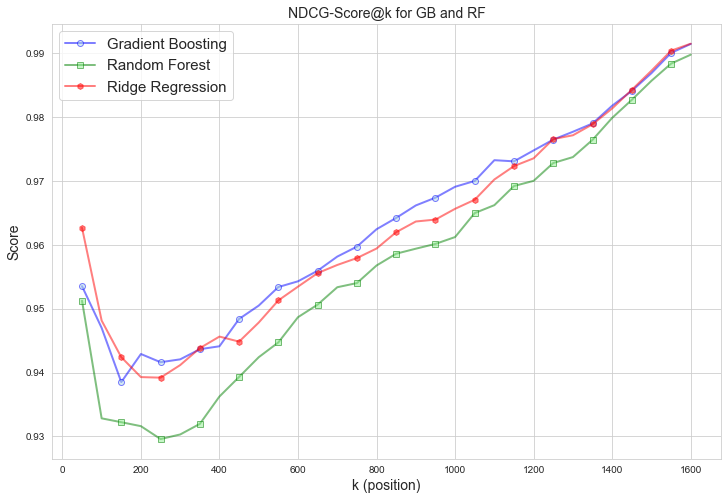

In [209]:
import seaborn as sns  
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.title("NDCG-Score@k for GB and RF", fontsize=14)
plt.plot(k_step, ndcg_gb, 'b-o', markerfacecolor='lightblue', markeredgewidth=1, markersize=6, linewidth=2, markevery=2, label = 'Gradient Boosting', alpha=0.5)
plt.plot(k_step, ndcg_rf, 'g-s', markerfacecolor='lightgreen', markeredgewidth=1, markersize=6, linewidth=2, markevery=2, label = 'Random Forest', alpha=0.5)
plt.plot(k_step, ndcg_rr, 'r-h', markerfacecolor='red', markeredgewidth=1, markersize=6, linewidth=2, markevery=2, label = 'Ridge Regression', alpha=0.5)
plt.xlabel('k (position)', fontsize=14)
plt.ylabel('Score', fontsize=14)
# plt.grid(color='gray')#, linestyle='dashed')
plt.legend(fontsize=15)

plt.savefig('ndcg_score.png', bbox_inches="tight")

In [15]:
from ml_metrics import mapk,auc

In [16]:
mapk([1,1,1,0,0,0], [9,8,4,5,2,1])

TypeError: object of type 'int' has no len()

In [17]:
label.shape

(1, 1569)

In [18]:
pred_gb.shape

(1, 1569)

In [19]:
label.reshape(-1,).shape

(1569,)

In [20]:
type(label.reshape(-1,))

numpy.ndarray

In [21]:
list(label)

[array([15, 13, 15, ..., 19, 22, 15], dtype=int64)]

In [87]:
auc([1,1,1,0,0,0], [0.9,0.8,0.4,0.5,0.2,0.1])

0.8888888888888888

In [86]:
mapk([[1,2,3,4,5]],[[2,3,1,5,4]], k = 1)

[1, 2, 3, 4, 5]
[2, 3, 1, 5, 4]


1.0

In [149]:
actual = [[1],[2],[3],[4],[5]]
predicted = [[1],[2],[3],[5],[4]]

In [136]:
actual = [[1,2,3,4,5]]
predicted = [[5,4,3,2,1]]

In [137]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
#     print(actual)
#     print(predicted)
    
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [150]:
[(a,p) for a,p in zip(actual, predicted)]

[([1], [1]), ([2], [2]), ([3], [3]), ([4], [5]), ([5], [4])]

In [159]:
mapk([[1]],[[2]])

0.0

In [138]:
np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

1.0

In [147]:
mapk(actual, predicted, k=100)

1.0

In [52]:
[(a,p) for a,p in zip(actual, predicted)]

[([1], [5]), ([2], [4]), ([3], [3]), ([4], [2]), ([5], [1])]

In [135]:
mapk(label.reshape(-1,1), pred_gb.reshape(-1,1), k=1000)

0.14977692797960485